# Explore here

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [63]:
data = pd.read_csv('/Users/julian/Desktop/vs code/fghfghfghfgh/Machine-learning-python-template_Project_12_Julian_Lopez/data/raw/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [64]:
# Obtener las dimensiones.
data.shape

(48895, 16)

In [65]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     


- Existen un total de 48895 filas (en este caso, alquileres) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `Price`.
- Las variables `last_review` y `reviews_per_month` solo tiene 38843 instancias con valores, por lo que contendría más de 10000 valores nulos. El resto de variables cuentan siempre con valor.
- Los datos cuentan con 9 características numéricas y 5 características categóricas.


In [66]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(0)

In [67]:
# Eliminar información irrelevante.
data_limpia = data.drop(['id', 'name', 'host_name', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis = 1, inplace = False)
data_limpia.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0


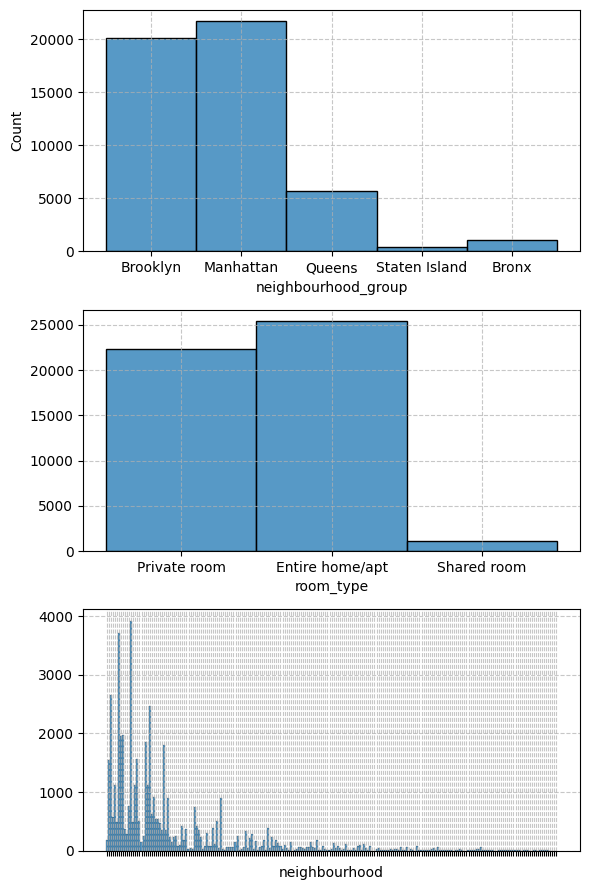

In [68]:
# Análisis sobre variables categóricas
# Histograma múltiple.
                                                    
fig, axis = plt.subplots(3, 1, figsize = (6, 9))

sns.histplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data_limpia, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_limpia, x = "neighbourhood").set(ylabel = None)
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)
axis[2].grid(linestyle='--', alpha=0.7)

axis[2].set_xticklabels([]) # Elimina las etiquetas del eje X

plt.tight_layout()
plt.show()


- **neighbourhood_group**: Podemos obserbar que la mayoria de los alquileres se llevan acabo en las ciudades de Brooklyn y Manhattan.
- **room_type**: La gran mayoria de esos alquileres son de habitaciones privadas o casas/apt enteros. 

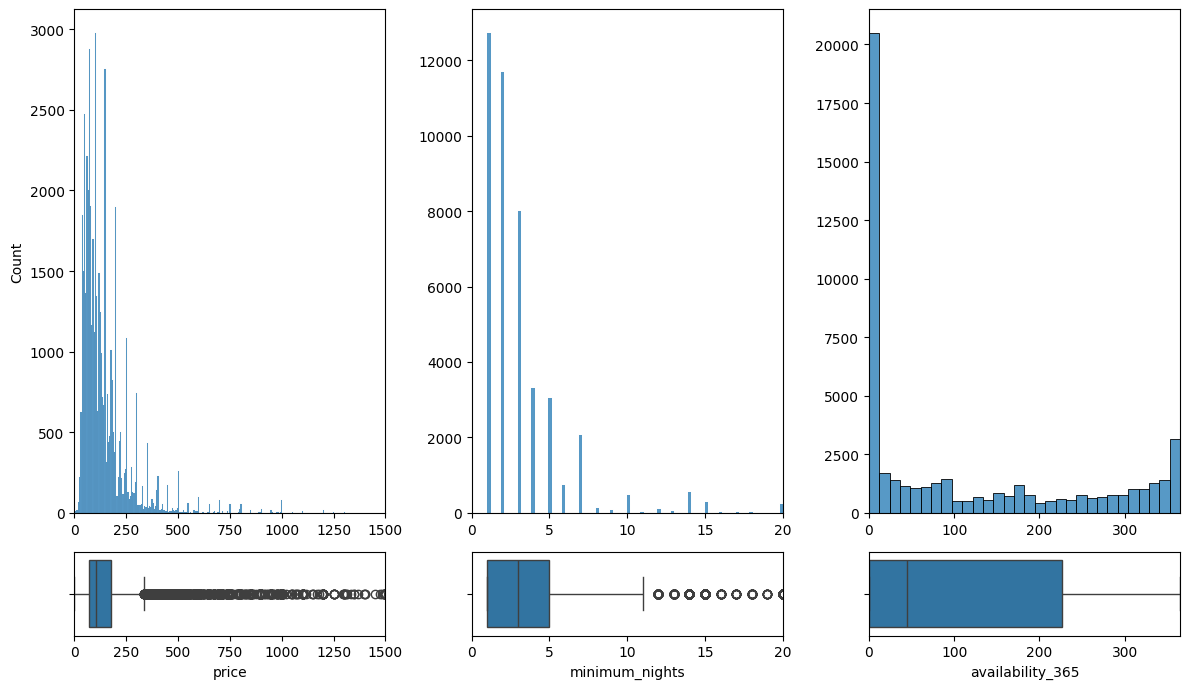

In [69]:
# Análisis sobre variables numéricas
# Figura múltiple con histogramas y diagramas de caja.

fig, axis = plt.subplots(2, 3, figsize = (12, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "availability_365")

axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

plt.tight_layout()
plt.show()



- **Price**: Podemos obserbar que tiene una distribución de poisson en la que la mayoria de los valores se acumulan entre los 0 y 500 dolares, estando ahi su media, bien sesgada a la izquierda, pero que podemos tambien obserbar que hay muhcos valores outliners de manera ascendente. (Se paga de media unos 100 dolares por alquiler).
- **Minimum nigths and availability**: En estas dos gráficas podemos obserbar una distribución geométrica con las medias sesgadas al lado izquierdo donde los valores son menores. (Suelen darse alquileres con una media de 3 días y estar disponibles unos 40 días al año).


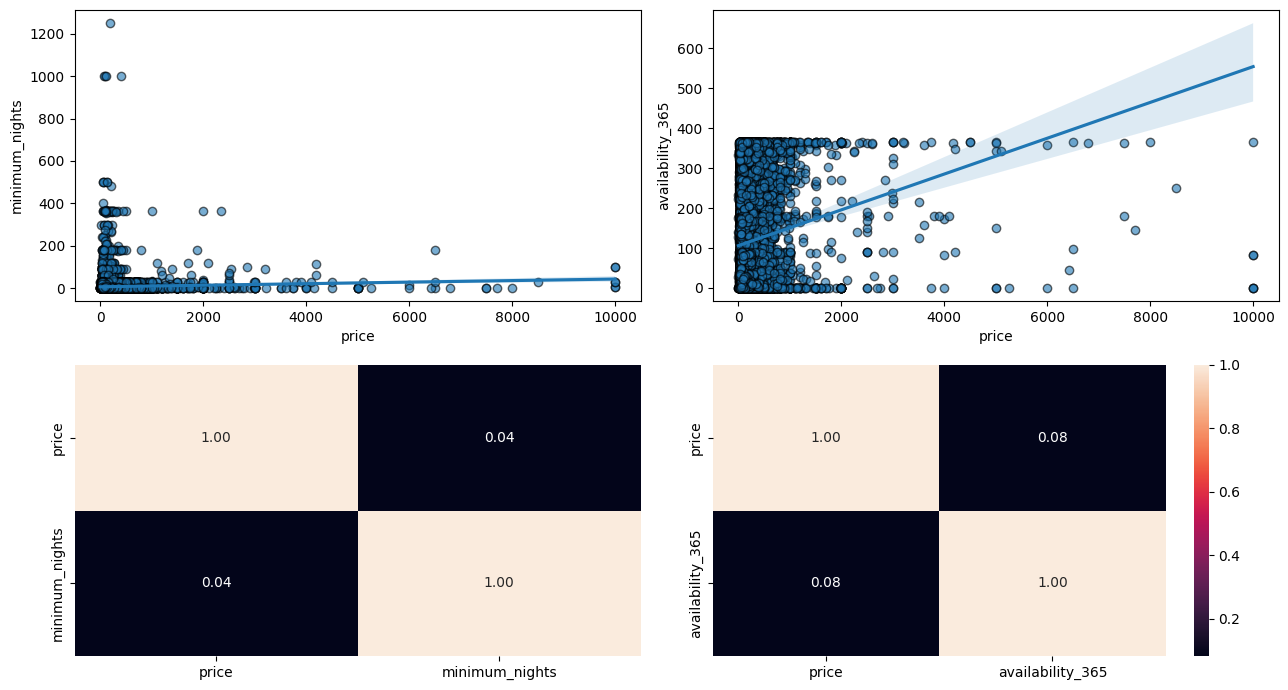

In [70]:
# Análisis numérico-numérico
# Diagrama de dispersión múltiple.

fig, axis = plt.subplots(2, 2, figsize = (13, 7))

sns.regplot(ax = axis[0, 0], data = data_limpia, x = "price", y = "minimum_nights", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "price", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()


La relación que existe entre el Precio y las noches minimas de estancia es minima y completamente normal. Por otro lado podemos eobserbar una relación tambien muy sutil pero algo mayor entre el precio y la disponibilidad de las estancias, sinedo mayor el orecio de las estancias con mas disponibilidad, podemos intuir que al ser mas caras se alquilan menos o menos personas pueden acceder a pagarlas. 

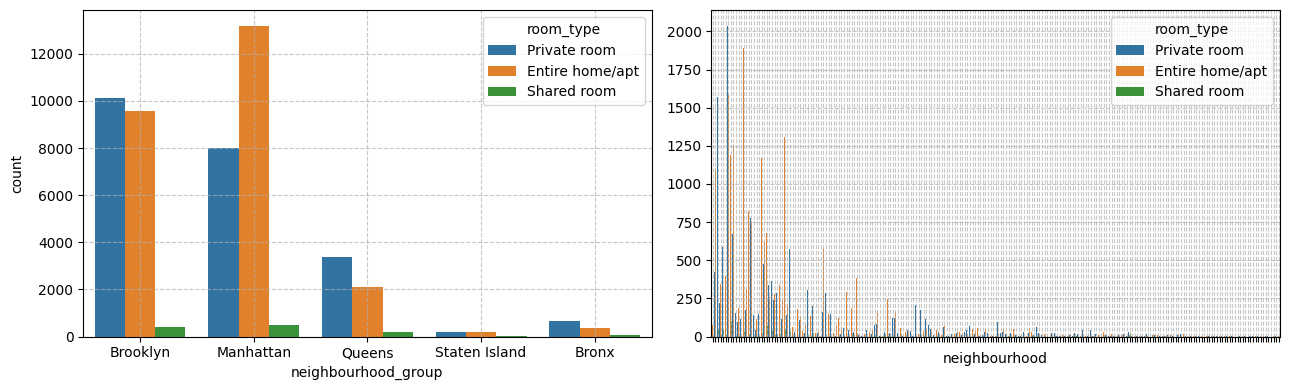

In [71]:
# Análisis categórico-categórico

fig, axis = plt.subplots(figsize = (13, 4), ncols = 2)

sns.countplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = data_limpia, x = "neighbourhood", hue = "room_type").set(ylabel = None)

axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

axis[1].set_xticklabels([]) # Elimina las etiquetas del eje X

plt.tight_layout()
plt.show()

En este caso el análisis de las variables categóricas entre si no seria necesario y no nos aportaria ninguna idea, puesto que el target de esrte EDA es una variable numérica y estos grafico no nos dan información sobre el precio de los alquileres. 

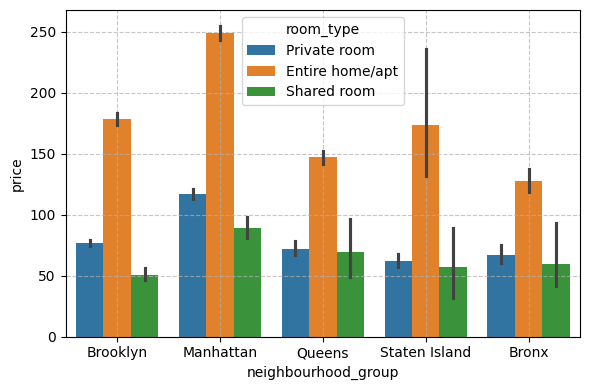

In [72]:
# Combinaciones de la clase con varias predictoras

plt.figure(figsize = (6, 4))
sns.barplot(data_limpia, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos obserbar que, como es de esperar, los precios de las viviendas que se alquilan enteras son superiores, pero que los precios de las habitaciones privadasy compartidas son muy pareceidos, y es por ese motivo que las habitaciones compartidas se alquilan muchisimo menos que las privadas. 

In [73]:
# Análisis de correlaciones.

# Factorización.

data_limpia["neighbourhood_group_n"] = pd.factorize(data_limpia["neighbourhood_group"])[0]

data_limpia["room_type_n"] = pd.factorize(data_limpia["room_type"])[0]

data_limpia["neighbourhood_n"] = pd.factorize(data_limpia["neighbourhood"])[0]

# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in data_limpia[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}

room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in data_limpia[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

neighbourhood_transformation_rules = {row["neighbourhood_n"]: row["neighbourhood"] for _, row in data_limpia[["neighbourhood_n", "neighbourhood"]].drop_duplicates().iterrows()}

# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "neighbourhood_group": neighbourhood_group_transformation_rules,
    "room_type": room_type_transformation_rules,
    "neighbourhood": neighbourhood_transformation_rules,
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)



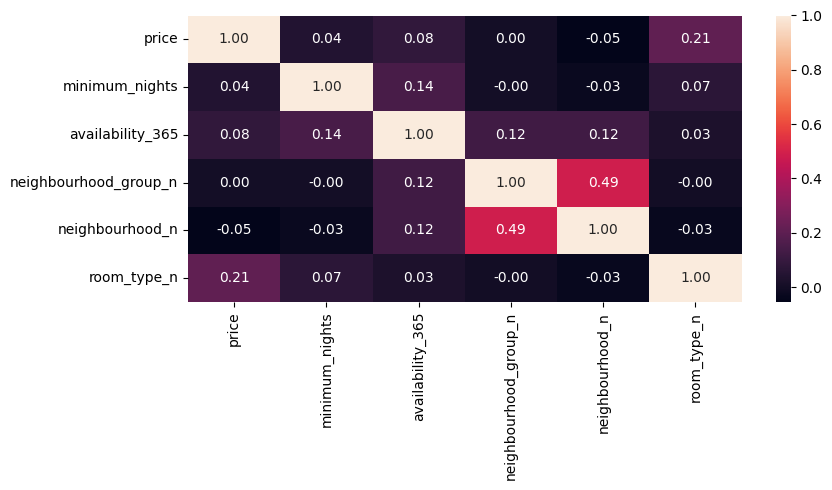

In [74]:
# Matriz de correlaciones.

fig, axis = plt.subplots(figsize = (9, 5))

sns.heatmap(data_limpia[["price", "minimum_nights", "availability_365", "neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Obserbamos dos relaciones relevantes, por un lado, como tinen sentido, hay una relacion bastante evidente entre el tipo de habitación que se alquila y su precio, y por otro lado observamos la relacion mas grande de la matriz entre las ciudades y sus resoectivos barrios. 

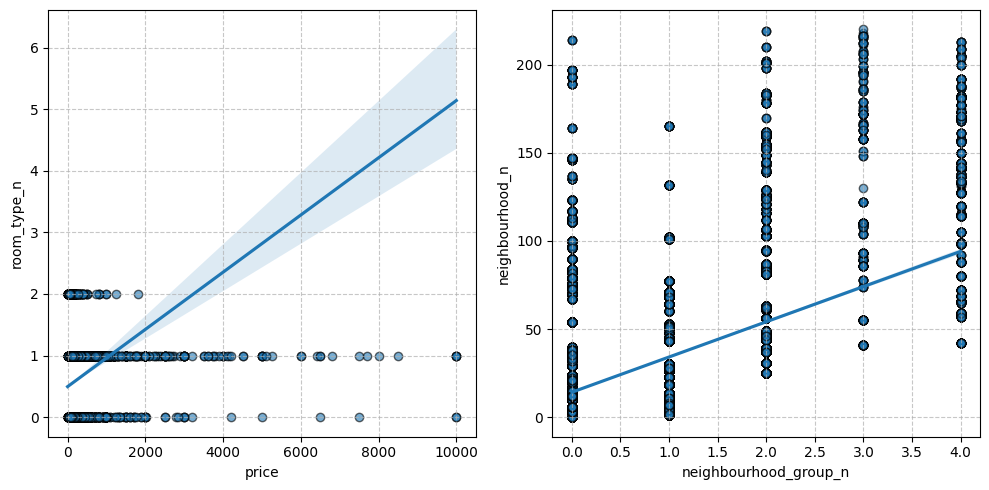

In [75]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:
# Existe una relación entre Precio y Room_type, como es lógico y también entre neighbourhood_group y neighbourhood.

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "price", y = "room_type_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "neighbourhood_group_n", y = "neighbourhood_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Como obseravamos en la anterior matriz de correlaciones, vemos en este gráfico como los precios de las habitaciones tiene una diferencia relevante entre si son por un lado privadas o casas completas o por otro lado habitaciones compartidas.  

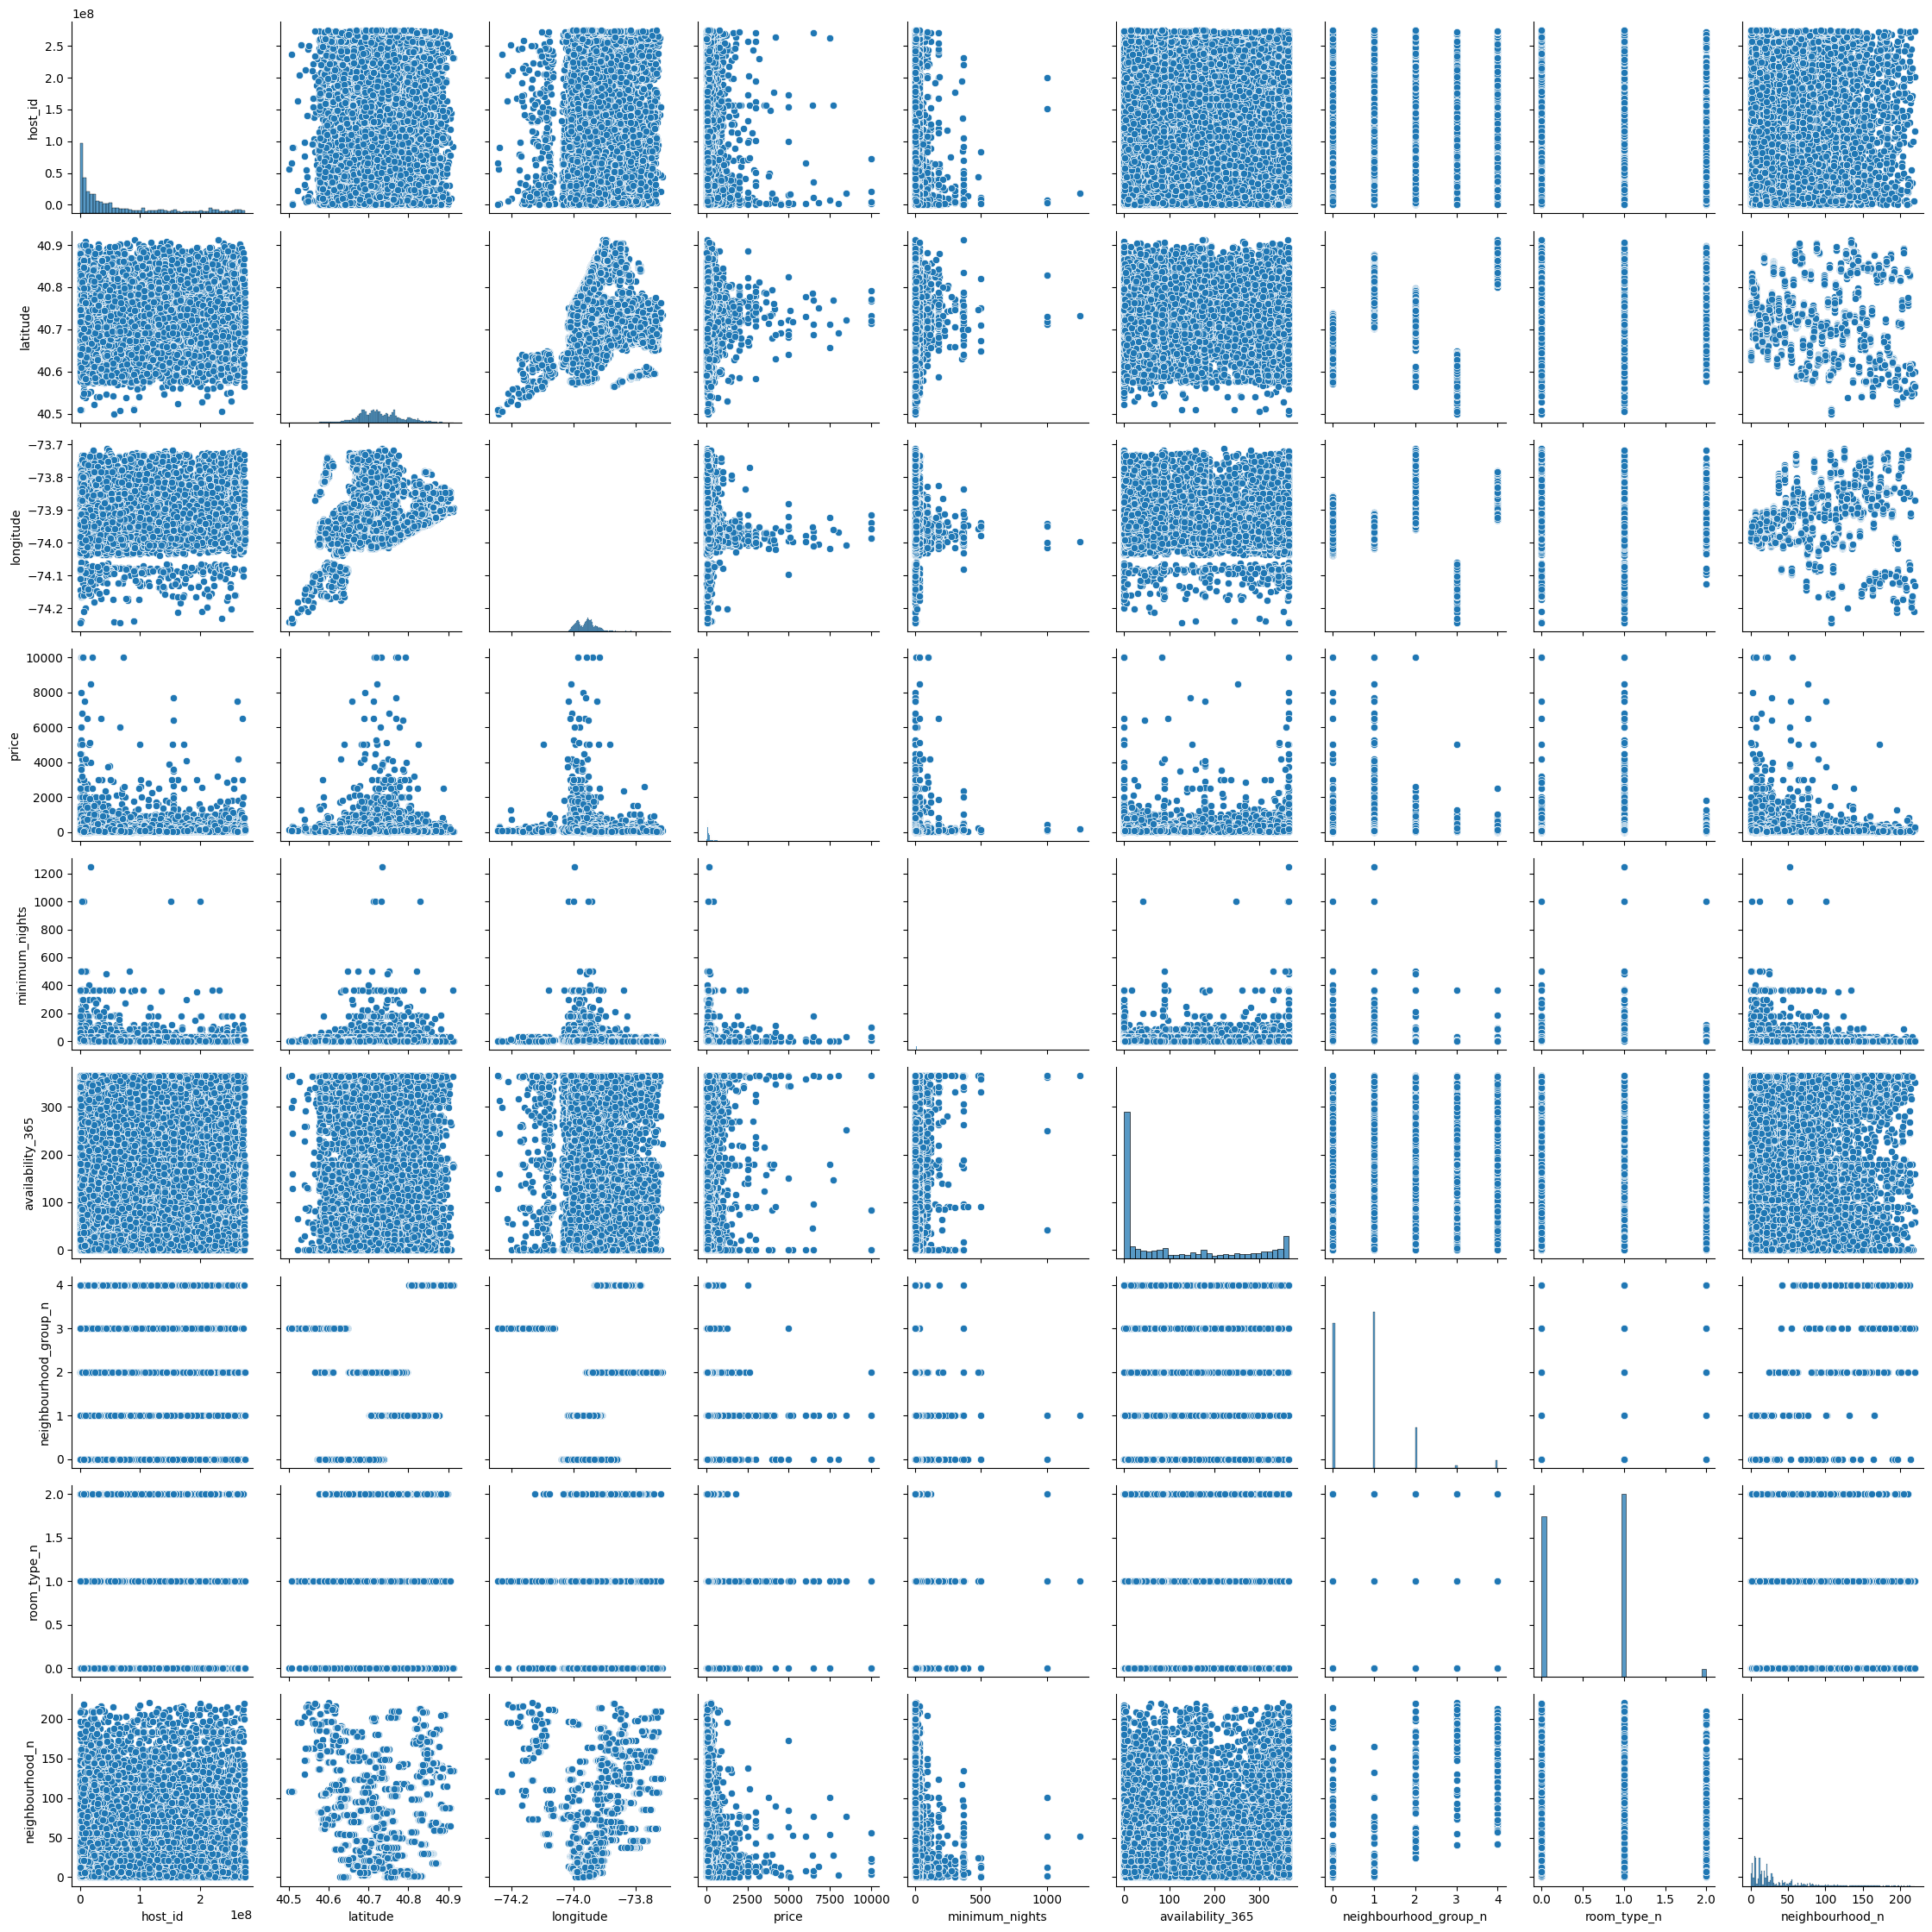

In [76]:
sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()